In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_json('../data/dataset.json')
df.head(2)

,category_id,published_date,price,update_stat_date,refreshed_date,view_count,is_sticky,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_register_date,steam_last_activity,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_balance,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_cs2_last_activity,steam_dota2_solo_mmr,steam_cs2_ban_date,steam_converted_balance,steam_cards_count,steam_cards_games,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_last_transaction_date,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_market_ban_end_date,steam_unturned_inv_value,steam_cs2_last_launched,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price
0,1,1692947861,597,0,1692947861,124,0,brute,0,1,,polygmail.com,,70108402,Germany,1379376000,1692916970,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,"0,--€",0,0,10,23,1638460805,0,0,0,NaN,NaN,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,1689552000,78,0,,0,0,0,256,1693378479,0,1638457947,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597
1,1,1693514394,75,1693552319,1693514394,17,0,resale,0,0,,unconsmail.com,,71126523,Austria,1692057600,1693514402,"{'list': [], 'total': 1}",0,,2,"0,--€",0,0,0,0,0,0,0,0,NaN,NaN,-1,243,0,-1,-1,0,1,0,243,0,0,0,0,0.4,0,545,1693440000,1,0,,0,0,1,0,0,-1,1693514083,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,75


In [3]:
pd.DataFrame(df.isna().sum())[df.isna().sum() > 0].T

,steam_cards_count,steam_cards_games
0,129624,129624


In [4]:
# cleaning the nan columns
df = df.drop(columns=['steam_cards_count', 'steam_cards_games'])
df.head()

,category_id,published_date,price,update_stat_date,refreshed_date,view_count,is_sticky,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_register_date,steam_last_activity,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_balance,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_cs2_last_activity,steam_dota2_solo_mmr,steam_cs2_ban_date,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_last_transaction_date,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_market_ban_end_date,steam_unturned_inv_value,steam_cs2_last_launched,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price
0,1,1692947861,597,0,1692947861,124,0,brute,0,1,,polygmail.com,,70108402,Germany,1379376000,1692916970,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,"0,--€",0,0,10,23,1638460805,0,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,1689552000,78,0,,0,0,0,256,1693378479,0,1638457947,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597
1,1,1693514394,75,1693552319,1693514394,17,0,resale,0,0,,unconsmail.com,,71126523,Austria,1692057600,1693514402,"{'list': [], 'total': 1}",0,,2,"0,--€",0,0,0,0,0,0,0,0,-1,243,0,-1,-1,0,1,0,243,0,0,0,0,0.4,0,545,1693440000,1,0,,0,0,1,0,0,-1,1693514083,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,75
2,1,1692382065,1000,1712537072,1692665913,92,0,resale,1,1,,oughlmail.com,,69083816,Russian Federation,1673568000,1692406636,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,17,"8,95 pуб.",0,0,20,27,1691716319,0,1692666274,8,-1,18,0,-1,-1,18,9,84,102,36,1,1,0,27.5,3,189,1691971200,7,0,,0,0,0,64,0,-1,1692382315,-1,0,0,-1,0,0,0,0,0,0,0,0,0,1000
3,1,1693392248,200,1698490769,1693392248,17,0,stealer,0,1,,actiodmail.com,,70902299,Mexico,1522281600,1606747244,"{'list': {'1237950': {'appid': 1237950, 'playt...",0,,0,Mex$ 0.00,0,0,4,1,0,0,0,0,-1,0,0,-1,-1,0,12,59,59,0,0,0,0,0.0,-1,5661,1593907200,8,0,,0,0,0,16672,1695984248,-1,0,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,200
4,1,1693488351,120,0,1693488351,25,0,brute,0,1,,otrimail.com,,71066650,Poland,1612483200,1693056359,"{'list': {'1017180': {'appid': 1017180, 'playt...",0,,3,"0,00zł",0,0,2,3,1618936147,0,0,0,-1,90,0,-1,-1,0,8,0,90,0,0,0,0,3.1,0,1180,1623888000,3,0,,0,0,0,16672,1694093163,-1,1691747092,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,120


### Preprocessing


#### Time features

In [5]:
from datetime import datetime
from tqdm.auto import tqdm

tqdm.pandas()

date_cols = ['published_date', 'update_stat_date', 'refreshed_date', 'steam_register_date', 'steam_last_activity', 'steam_cs2_last_activity', 'steam_cs2_ban_date', 'steam_last_transaction_date', 'steam_market_ban_end_date', 'steam_cs2_last_launched']

for col in date_cols:
    df[col] = df[col].progress_apply(lambda x: datetime.fromtimestamp(x) if x != 0 else np.NaN)
    
df.head(2)

/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 129624/129624 [00:00<00:00, 1519782.58it/s]


,category_id,published_date,price,update_stat_date,refreshed_date,view_count,is_sticky,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_register_date,steam_last_activity,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_balance,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_cs2_last_activity,steam_dota2_solo_mmr,steam_cs2_ban_date,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_last_transaction_date,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_market_ban_end_date,steam_unturned_inv_value,steam_cs2_last_launched,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price
0,1,2023-08-25 10:17:41,597,NaT,2023-08-25 10:17:41,124,0,brute,0,1,,polygmail.com,,70108402,Germany,2013-09-17 04:00:00,2023-08-25 01:42:50,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,"0,--€",0,0,10,23,2021-12-02 19:00:05,0,NaT,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,2023-07-17 03:00:00,78,0,,0,0,0,256,2023-08-30 09:54:39,0,2021-12-02 18:12:27,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597
1,1,2023-08-31 23:39:54,75,2023-09-01 10:11:59,2023-08-31 23:39:54,17,0,resale,0,0,,unconsmail.com,,71126523,Austria,2023-08-15 03:00:00,2023-08-31 23:40:02,"{'list': [], 'total': 1}",0,,2,"0,--€",0,0,0,0,NaT,0,NaT,0,-1,243,0,-1,-1,0,1,0,243,0,0,0,0,0.4,0,545,2023-08-31 03:00:00,1,0,,0,0,1,0,NaT,-1,2023-08-31 23:34:43,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,75


## EDA

### Checking the categorical columns

In [6]:
df['category_id'].unique(), \
    df['is_sticky'].unique(), \
        df['extended_guarantee'].unique(), \
            df['nsb'].unique(), \
                df['email_type'].unique(), \
                    df['resale_item_origin'].unique(), \
                        df['steam_community_ban'].unique(), \
                            df['steam_is_limited'].unique(), \
                                df['steam_market'].unique(), \
                                    df['steam_cs2_ban_type'].unique()

(array([1]),
 array([0]),
 array([ 0,  1, -1]),
 array([ 1,  0, -1]),
 array(['', 'native'], dtype=object),
 array(['', 'brute', 'fishing', 'stealer', 'resale', 'autoreg', 'personal'],
       dtype=object),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0]))

#### Delete category_id and is_sticky because they are constant

In [7]:
df = df.drop(columns=['category_id', 'is_sticky'])

### Checking target distribution

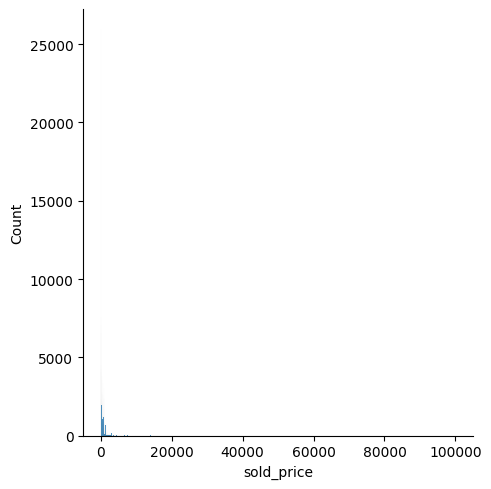

In [8]:
g = sns.displot(df['sold_price'])

In [9]:
df['sold_price'].max(), df['sold_price'].min(), df['sold_price'].mean()

(99999, 1, 452.61833456767266)

## Feature engineering

In [10]:
df.head()

,published_date,price,update_stat_date,refreshed_date,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_register_date,steam_last_activity,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_balance,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_cs2_last_activity,steam_dota2_solo_mmr,steam_cs2_ban_date,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_last_transaction_date,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_market_ban_end_date,steam_unturned_inv_value,steam_cs2_last_launched,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price
0,2023-08-25 10:17:41,597,NaT,2023-08-25 10:17:41,124,brute,0,1,,polygmail.com,,70108402,Germany,2013-09-17 04:00:00,2023-08-25 01:42:50,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,"0,--€",0,0,10,23,2021-12-02 19:00:05,0,NaT,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,2023-07-17 03:00:00,78,0,,0,0,0,256,2023-08-30 09:54:39,0,2021-12-02 18:12:27,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597
1,2023-08-31 23:39:54,75,2023-09-01 10:11:59,2023-08-31 23:39:54,17,resale,0,0,,unconsmail.com,,71126523,Austria,2023-08-15 03:00:00,2023-08-31 23:40:02,"{'list': [], 'total': 1}",0,,2,"0,--€",0,0,0,0,NaT,0,NaT,0,-1,243,0,-1,-1,0,1,0,243,0,0,0,0,0.4,0,545,2023-08-31 03:00:00,1,0,,0,0,1,0,NaT,-1,2023-08-31 23:34:43,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,75
2,2023-08-18 21:07:45,1000,2024-04-08 03:44:32,2023-08-22 03:58:33,92,resale,1,1,,oughlmail.com,,69083816,Russian Federation,2023-01-13 03:00:00,2023-08-19 03:57:16,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,17,"8,95 pуб.",0,0,20,27,2023-08-11 04:11:59,0,2023-08-22 04:04:34,8,-1,18,0,-1,-1,18,9,84,102,36,1,1,0,27.5,3,189,2023-08-14 03:00:00,7,0,,0,0,0,64,NaT,-1,2023-08-18 21:11:55,-1,0,0,-1,0,0,0,0,0,0,0,0,0,1000
3,2023-08-30 13:44:08,200,2023-10-28 13:59:29,2023-08-30 13:44:08,17,stealer,0,1,,actiodmail.com,,70902299,Mexico,2018-03-29 03:00:00,2020-11-30 17:40:44,"{'list': {'1237950': {'appid': 1237950, 'playt...",0,,0,Mex$ 0.00,0,0,4,1,NaT,0,NaT,0,-1,0,0,-1,-1,0,12,59,59,0,0,0,0,0.0,-1,5661,2020-07-05 03:00:00,8,0,,0,0,0,16672,2023-09-29 13:44:08,-1,NaT,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,200
4,2023-08-31 16:25:51,120,NaT,2023-08-31 16:25:51,25,brute,0,1,,otrimail.com,,71066650,Poland,2021-02-05 03:00:00,2023-08-26 16:25:59,"{'list': {'1017180': {'appid': 1017180, 'playt...",0,,3,"0,00zł",0,0,2,3,2021-04-20 19:29:07,0,NaT,0,-1,90,0,-1,-1,0,8,0,90,0,0,0,0,3.1,0,1180,2021-06-17 03:00:00,3,0,,0,0,0,16672,2023-09-07 16:26:03,-1,2023-08-11 12:44:52,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,120


### Extracting time features

In [11]:
def extract_time_features(df: pd.DataFrame, col: str):
    """
    Extracts year, month, day, hour, minute, and second from a datetime column.
    Handles NaN values gracefully.
    
    Parameters:
    - df: pd.DataFrame - DataFrame with the datetime column
    - col: str - Name of the column with datetime values
    
    Returns:
    - pd.DataFrame - DataFrame with new time feature columns
    """
    df = df.copy()
    
    
    # Extract features, accounting for NaN values
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df[col + '_second'] = df[col].dt.second
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_is_weekend'] = df[col].dt.weekday.isin([5, 6]).astype(int)
    
    # Replace NaN values in newly created columns with appropriate defaults
    time_cols = [col + '_year', col + '_month', col + '_day', 
                 col + '_hour', col + '_minute', col + '_second', 
                 col + '_weekday', col + '_is_weekend']
    for time_col in time_cols:
        df[time_col] = df[time_col].fillna(np.nan)  # Preserve NaN if needed
    
    return df

for col in tqdm(date_cols, desc='Extracting time features'):
    df = extract_time_features(df, col)
    
df = df.drop(columns=date_cols)
    
df.head(2)

Extracting time features: 100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_balance,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,"0,--€",0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0
1,75,17,resale,0,0,,unconsmail.com,,71126523,Austria,"{'list': [], 'total': 1}",0,,2,"0,--€",0,0,0,0,0,0,-1,243,0,-1,-1,0,1,0,243,0,0,0,0,0.4,0,545,1,0,,0,0,1,0

#### steam_balance column

In [12]:
df['steam_balance'].unique()

array(['0,--€', '8,95 pуб.', 'Mex$ 0.00', ..., '10,91 TL', '18,36 TL',
       '$U21,59'], dtype=object)

In [13]:
# Выделение валюты

import re

def remove_numbers_dots_dashes(s: str) -> str:
    """
    Removes all numbers, dots, and dashes from a given string.
    
    Parameters:
    - s: str - The input string.
    
    Returns:
    - str - The modified string without numbers, dots, and dashes.
    """
    if not isinstance(s, str):
        raise ValueError("Input must be a string.")
    
    # Use regex to replace numbers, dots, and dashes
    result = re.sub(r'[0-9.,-]', '', s)
    return result

df['steam_currency'] = df['steam_balance'].progress_apply(lambda x: remove_numbers_dots_dashes(x))

df = df.drop(columns=['steam_balance'])

df.head(1)

100%|██████████| 129624/129624 [00:00<00:00, 1316196.15it/s]


,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€


#### sum of same meaning columns

In [14]:
df['inv_value_sum'] = 0
df['game_count_sum'] = 0
df['level_sum'] = 0

for col in tqdm(df.columns):
    if 'inv_value' in col:
        df['inv_value_sum'] += df[col]
    if 'game_count' in col:
        df['game_count_sum'] += df[col]
    if 'level' in col:
        df['level_sum'] += df[col]
       
df.head(1)

100%|██████████| 142/142 [00:00<00:00, 44794.76it/s]


,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency,inv_value_sum,game_count_sum,level_sum
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€,2962,406,20


#### groupbying by some features

In [15]:
"""steam_country_df = df.groupby('steam_country').aggregate(
    country_price_mean=pd.NamedAgg(column='price', aggfunc='mean'),
    country_price_max=pd.NamedAgg(column='price', aggfunc='max'),
    country_price_min=pd.NamedAgg(column='price', aggfunc='min'),
    country_price_std=pd.NamedAgg(column='price', aggfunc=np.std),
)

steam_country_df = steam_country_df.fillna(0)

item_domain_df = df.groupby('item_domain').aggregate(
    item_domain_price_mean=pd.NamedAgg(column='price', aggfunc='mean'),
    item_domain_price_max=pd.NamedAgg(column='price', aggfunc='max'),
    item_domain_price_min=pd.NamedAgg(column='price', aggfunc='min'),
    item_domain_price_std=pd.NamedAgg(column='price', aggfunc=np.std),
)

item_domain_df = item_domain_df.fillna(0)

df = df.merge(steam_country_df, how='left', on='steam_country').merge(item_domain_df, how='left', on='item_domain')"""


"steam_country_df = df.groupby('steam_country').aggregate(\n    country_price_mean=pd.NamedAgg(column='price', aggfunc='mean'),\n    country_price_max=pd.NamedAgg(column='price', aggfunc='max'),\n    country_price_min=pd.NamedAgg(column='price', aggfunc='min'),\n    country_price_std=pd.NamedAgg(column='price', aggfunc=np.std),\n)\n\nsteam_country_df = steam_country_df.fillna(0)\n\nitem_domain_df = df.groupby('item_domain').aggregate(\n    item_domain_price_mean=pd.NamedAgg(column='price', aggfunc='mean'),\n    item_domain_price_max=pd.NamedAgg(column='price', aggfunc='max'),\n    item_domain_price_min=pd.NamedAgg(column='price', aggfunc='min'),\n    item_domain_price_std=pd.NamedAgg(column='price', aggfunc=np.std),\n)\n\nitem_domain_df = item_domain_df.fillna(0)\n\ndf = df.merge(steam_country_df, how='left', on='steam_country').merge(item_domain_df, how='left', on='item_domain')"

#### steam_full_games col

In [16]:
df['steam_full_games'].iloc[0]

{'list': {'730': {'appid': 730, 'playtime_forever': 18.7},
  '252950': {'appid': 252950, 'playtime_forever': 71.38},
  '289070': {'appid': 289070, 'playtime_forever': 273.17},
  '250900': {'appid': 250900, 'playtime_forever': 114.27},
  '381210': {'appid': 381210, 'playtime_forever': 113.07},
  '326460': {'appid': 326460, 'playtime_forever': 48.58},
  '1124300': {'appid': 1124300, 'playtime_forever': 45.52},
  '945360': {'appid': 945360, 'playtime_forever': 44.92},
  '113200': {'appid': 113200, 'playtime_forever': 43.48},
  '1145360': {'appid': 1145360, 'playtime_forever': 38.32},
  '780290': {'appid': 780290, 'playtime_forever': 34.08},
  '1794680': {'appid': 1794680, 'playtime_forever': 29.35},
  '1196590': {'appid': 1196590, 'playtime_forever': 18.77},
  '571740': {'appid': 571740, 'playtime_forever': 16.5},
  '1282730': {'appid': 1282730, 'playtime_forever': 15.85},
  '880940': {'appid': 880940, 'playtime_forever': 14.6},
  '1158310': {'appid': 1158310, 'playtime_forever': 14.18},


In [17]:
def extract_steam_full_games_features(df, column_name='steam_full_games'):
    """
    Extracts features from the `steam_full_games` column in a DataFrame.

    Parameters:
    - df: pd.DataFrame - Input DataFrame containing the `steam_full_games` column.
    - column_name: str - Name of the column with the game data (default: 'steam_full_games').

    Returns:
    - pd.DataFrame - Updated DataFrame with extracted features.
    """
    def process_entry(entry):
        if not isinstance(entry, dict) or 'list' not in entry:
            return {
                'total_playtime': 0,
                'average_playtime': 0,
                'std_playtime': 0,
                'num_games_played': 0,
                'num_games_zero_playtime': 0,
            }
        
        # Handle 'list' as dict or list
        game_list = entry['list']
        if isinstance(game_list, dict):  # If 'list' is a dict
            playtimes = [float(game.get('playtime_forever', 0)) for game in game_list.values()]
        elif isinstance(game_list, list):  # If 'list' is a list
            playtimes = [float(game.get('playtime_forever', 0)) for game in game_list]
        else:  # Unexpected format
            playtimes = []
        
        total_playtime = sum(playtimes)
        num_games_played = sum(1 for p in playtimes if p > 0)
        num_games_zero_playtime = sum(1 for p in playtimes if p == 0)
        average_playtime = np.mean(playtimes) if playtimes else 0
        std_playtime = np.std(playtimes) if playtimes else 0

        return {
            'total_playtime': total_playtime,
            'average_playtime': average_playtime,
            'std_playtime': std_playtime,
            'num_games_played': num_games_played,
            'num_games_zero_playtime': num_games_zero_playtime,
        }

    # Apply the feature extraction
    features_df = df[column_name].apply(lambda x: pd.Series(process_entry(x)))
    
    # Merge the new features back into the original DataFrame
    df = pd.concat([df, features_df], axis=1)
    return df

df = extract_steam_full_games_features(df)
df.head(1)

,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_full_games,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency,inv_value_sum,game_count_sum,level_sum,total_playtime,average_playtime,std_playtime,num_games_played,num_games_zero_playtime
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,"{'list': {'730': {'appid': 730, 'playtime_fore...",0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€,2962,406,20,1101.26,14.118718,36.607566,

In [18]:
df['total_steam_games'] = df['steam_full_games'].apply(lambda x: x['total'] if 'total' in x != None else -1)

def sum_playtime(x):
    
    s = 0
    
    if isinstance(x, dict):
        if 'list' in list(x.keys()):
            for key in x['list']:
                s += float(x['list'][key]['playtime_forever'])
        
    return s

def std_playtime(x):
    playtimes = []
    std = 0
    
    if isinstance(x, dict):
        if 'list' in list(x.keys()):
            for key in x['list']:
                playtimes.append(float(x['list'][key]['playtime_forever']))
            std = np.std(playtimes)
    return std

df['total_playtime'] = df['steam_full_games'].progress_apply(lambda x: sum_playtime(x))
df['std_playtime'] = df['steam_full_games'].progress_apply(lambda x: std_playtime(x))
df = df.drop(columns=['steam_full_games'])

df.head(1)

  0%|          | 0/129624 [00:00<?, ?it/s]/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 129624/129624 [00:01<00:00, 123159.48it/s]


,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency,inv_value_sum,game_count_sum,level_sum,total_playtime,average_playtime,std_playtime,num_games_played,num_games_zero_playtime,total_steam_games
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€,2962,406,20,1101.26,14.118718,36.607566,54.0,24.0,125


In [19]:
max(np.abs(df['price'] - df['sold_price']))

99998

In [20]:
df['steam_has_activated_keys'].unique()

array([-1])

#### Some additional features

In [21]:
df.head()

,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency,inv_value_sum,game_count_sum,level_sum,total_playtime,average_playtime,std_playtime,num_games_played,num_games_zero_playtime,total_steam_games
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€,2962,406,20,1101.26,14.118718,36.607566,54.0,24.0,125
1,75,17,resale,0,0,,unconsmail.com,,7

In [22]:
df['price_per_view'] = df['price'] / df['view_count']


In [23]:
import pandas as pd
from datetime import datetime

def add_engineered_features(df):
    # Step 3: Calculate other features
    # Total inventory value
    inventory_cols = [col for col in df.columns if col.endswith('_inv_value')]
    df['total_inventory_value'] = df[inventory_cols].sum(axis=1)
    
    # Inventory value per game
    df['inventory_value_per_game'] = df['total_inventory_value'] / df['steam_game_count']
    df['inventory_value_per_game'].fillna(0, inplace=True)  # Handle division by zero
    
    # Dota2 win rate
    df['dota2_win_rate'] = df['steam_dota2_win_count'] / (df['steam_dota2_win_count'] + df['steam_dota2_lose_count'])
    df['dota2_win_rate'].fillna(0, inplace=True)  # Handle division by zero
    
    # Average playtime per game
    df['average_playtime_per_game'] = df['total_playtime'] / df['num_games_played']
    df['average_playtime_per_game'].fillna(0, inplace=True)  # Handle division by zero
    
    # Percentage of games with zero playtime
    df['percentage_zero_playtime_games'] = (df['num_games_zero_playtime'] / df['num_games_played']) * 100
    df['percentage_zero_playtime_games'].fillna(0, inplace=True)  # Handle division by zero
    
    # Net purchased rub
    df['net_purchased_rub'] = df['steam_total_purchased_rub'] - df['steam_total_refunds_rub']
    
    # Refund to purchase ratio
    df['refund_to_purchase_ratio'] = df['steam_total_refunds_rub'] / df['steam_total_purchased_rub']
    df['refund_to_purchase_ratio'].fillna(0, inplace=True)  # Handle division by zero
    
    # Inventory to purchases ratio
    df['inventory_to_purchases_ratio'] = df['total_inventory_value'] / df['steam_total_purchased_rub']
    df['inventory_to_purchases_ratio'].fillna(0, inplace=True)  # Handle division by zero
    
    # Games with positive playtime
    df['games_with_positive_playtime'] = df['num_games_played'] - df['num_games_zero_playtime']
    
    # Step 4: Handle missing values
    df.fillna(0, inplace=True)  # Fill remaining NaN values with zeros or use appropriate strategy
    
    return df

#df = add_engineered_features(df)

## Training the model

In [24]:
is_weekend_features = []
for col in df.columns:
    if 'is_weekend' in col:
        is_weekend_features.append(col)
        
is_weekend_features

['published_date_is_weekend',
 'update_stat_date_is_weekend',
 'refreshed_date_is_weekend',
 'steam_register_date_is_weekend',
 'steam_last_activity_is_weekend',
 'steam_cs2_last_activity_is_weekend',
 'steam_cs2_ban_date_is_weekend',
 'steam_last_transaction_date_is_weekend',
 'steam_market_ban_end_date_is_weekend',
 'steam_cs2_last_launched_is_weekend']

In [25]:
cat_features = ['item_origin', 'extended_guarantee', 'nsb', 'email_type', 'item_domain', 'resale_item_origin', 'steam_country', 'steam_community_ban', 'steam_is_limited',
                'steam_cs2_wingman_rank_id', 'steam_cs2_rank_id', 'steam_cs2_ban_type', 'steam_currency'] + is_weekend_features

In [26]:
import pandas as pd

def extract_bans_features(df):
    # Initialize a set to store unique game IDs
    unique_game_ids = set()
    
    # Iterate through each row in the DataFrame to collect unique game IDs
    for bans in tqdm(df['steam_bans']):
        if isinstance(bans, str):
            game_ids = bans.strip('<>').split('><')
            unique_game_ids.update(game_ids)
    
    # Create binary indicators for each unique game ID
    for game_id in tqdm(unique_game_ids):
        df[f'has_{game_id}'] = df['steam_bans'].apply(lambda x: 1 if isinstance(x, str) and game_id in x.strip('<>').split('><') else 0)
    
    # Optionally, you can also count the number of bans per row
    df['total_bans'] = df['steam_bans'].progress_apply(lambda x: len(x.strip('<>').split('><')) if isinstance(x, str) else 0)
    
    return df

# Example usage
# Assuming df is your DataFrame
#df = extract_bans_features(df)

In [27]:
df.head()

,price,view_count,item_origin,extended_guarantee,nsb,email_type,item_domain,resale_item_origin,steam_item_id,steam_country,steam_community_ban,steam_bans,steam_cs2_profile_rank,steam_cs2_rank_id,steam_is_limited,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_cs2_wingman_rank_id,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_cs2_ban_type,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,published_date_is_weekend,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,update_stat_date_is_weekend,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,refreshed_date_is_weekend,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_register_date_is_weekend,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_last_activity_is_weekend,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_last_activity_is_weekend,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_cs2_ban_date_is_weekend,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_last_transaction_date_is_weekend,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_market_ban_end_date_is_weekend,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,steam_cs2_last_launched_is_weekend,steam_currency,inv_value_sum,game_count_sum,level_sum,total_playtime,average_playtime,std_playtime,num_games_played,num_games_zero_playtime,total_steam_games,price_per_view
0,597,124,brute,0,1,,polygmail.com,,70108402,Germany,0,,4,0,0,10,23,0,0,-1,130,0,0,-1,0,125,612,742,0,0,0,0,14.4,0,88195,78,0,,0,0,0,256,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,597,2023,8,25,10,17,41,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,8,25,10,17,41,4,0,2013.0,9.0,17.0,4.0,0.0,0.0,1.0,0,2023,8,25,1,42,50,4,0,2021.0,12.0,2.0,19.0,0.0,5.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023.0,7.0,17.0,3.0,0.0,0.0,0.0,0,2023.0,8.0,30.0,9.0,54.0,39.0,2.0,0,2021.0,12.0,2.0,18.0,12.0,27.0,3.0,0,€,2962,406,20,1101.26,14.118718,36.607566,54.0,24.0,125,4.814516
1,75,17,resal

In [28]:
import pandas as pd

def one_hot_encode_and_drop(df, columns):
    """
    One-hot-encodes the specified columns in a DataFrame and drops the original columns.
    
    Parameters:
    - df: pd.DataFrame - Input DataFrame.
    - columns: list of str - List of column names to be one-hot-encoded.
    
    Returns:
    - pd.DataFrame - Updated DataFrame with one-hot-encoded columns and original columns dropped.
    """
    # Ensure columns exist in the DataFrame
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_columns}")
    
    # Perform one-hot encoding
    encoded_df = pd.get_dummies(df, columns=columns, drop_first=False)
    
    return encoded_df

df = one_hot_encode_and_drop(df, cat_features)

#df = df.drop(columns=cat_features)
df.head(1)

,price,view_count,steam_item_id,steam_bans,steam_cs2_profile_rank,steam_level,steam_friend_count,steam_dota2_solo_mmr,steam_converted_balance,steam_pubg_inv_value,steam_cs2_inv_value,steam_dota2_inv_value,steam_tf2_inv_value,steam_rust_inv_value,steam_game_count,steam_steam_inv_value,steam_inv_value,steam_cs2_win_count,steam_dota2_game_count,steam_dota2_lose_count,steam_dota2_win_count,steam_hours_played_recently,steam_faceit_level,steam_points,steam_relevant_game_count,steam_gift_count,steam_limit_spent,steam_dota2_behavior,steam_mfa,steam_market,steam_market_restrictions,steam_unturned_inv_value,steam_kf2_inv_value,steam_dst_inv_value,steam_cs2_premier_elo,steam_has_activated_keys,steam_rust_kill_player,steam_rust_deaths,steam_total_gifts_rub,steam_total_refunds_rub,steam_total_ingame_rub,steam_total_games_rub,steam_total_purchased_rub,steam_dota2_last_match_date,sold_price,published_date_year,published_date_month,published_date_day,published_date_hour,published_date_minute,published_date_second,published_date_weekday,update_stat_date_year,update_stat_date_month,update_stat_date_day,update_stat_date_hour,update_stat_date_minute,update_stat_date_second,update_stat_date_weekday,refreshed_date_year,refreshed_date_month,refreshed_date_day,refreshed_date_hour,refreshed_date_minute,refreshed_date_second,refreshed_date_weekday,steam_register_date_year,steam_register_date_month,steam_register_date_day,steam_register_date_hour,steam_register_date_minute,steam_register_date_second,steam_register_date_weekday,steam_last_activity_year,steam_last_activity_month,steam_last_activity_day,steam_last_activity_hour,steam_last_activity_minute,steam_last_activity_second,steam_last_activity_weekday,steam_cs2_last_activity_year,steam_cs2_last_activity_month,steam_cs2_last_activity_day,steam_cs2_last_activity_hour,steam_cs2_last_activity_minute,steam_cs2_last_activity_second,steam_cs2_last_activity_weekday,steam_cs2_ban_date_year,steam_cs2_ban_date_month,steam_cs2_ban_date_day,steam_cs2_ban_date_hour,steam_cs2_ban_date_minute,steam_cs2_ban_date_second,steam_cs2_ban_date_weekday,steam_last_transaction_date_year,steam_last_transaction_date_month,steam_last_transaction_date_day,steam_last_transaction_date_hour,steam_last_transaction_date_minute,steam_last_transaction_date_second,steam_last_transaction_date_weekday,steam_market_ban_end_date_year,steam_market_ban_end_date_month,steam_market_ban_end_date_day,steam_market_ban_end_date_hour,steam_market_ban_end_date_minute,steam_market_ban_end_date_second,steam_market_ban_end_date_weekday,steam_cs2_last_launched_year,steam_cs2_last_launched_month,steam_cs2_last_launched_day,steam_cs2_last_launched_hour,steam_cs2_last_launched_minute,steam_cs2_last_launched_second,steam_cs2_last_launched_weekday,inv_value_sum,game_count_sum,level_sum,total_playtime,average_playtime,std_playtime,num_games_played,num_games_zero_playtime,total_steam_games,price_per_view,item_origin_autoreg,item_origin_brute,item_origin_fishing,item_origin_personal,item_origin_resale,item_origin_stealer,extended_guarantee_-1,extended_guarantee_0,extended_guarantee_1,nsb_-1,nsb_0,nsb_1,email_type_,email_type_native,item_domain_,item_domain_acioumail.com,item_domain_acrometermail.com,item_domain_actiodmail.com,item_domain_adoenmail.com,item_domain_adventuredmail.com,item_domain_alounmail.com,item_domain_amentarianmail.com,item_domain_amwomail.com,item_domain_antimimail.com,item_domain_antiscmail.com,item_domain_aplotmail.com,item_domain_athemail.com,item_domain_ationismmail.com,item_domain_ationsmail.com,item_domain_atoptomail.com,item_domain_autisdmail.com,item_domain_autorambler.ru,item_domain_basisdmail.com,item_domain_belieomail.com,item_domain_berkensmail.com,item_domain_bfirstmail.com,item_domain_bk.ru,item_domain_boredemail.com,item_domain_boreemail.com,item_domain_bsenmail.com,item_domain_buffsmail.com,item_domain_bundrpmail.com,item_domain_canismmail.com,item_domain_caramail.com,item_domain_catachremail.com,item_domain_catimail.com,item_

In [29]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

for c in df.columns:
    df[c] = df[c].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['sold_price', 'steam_bans', 'steam_limit_spent', 'steam_has_activated_keys']), df['sold_price'], shuffle=True, random_state=42, 
                                                  test_size=0.078)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, shuffle=True, test_size=0.15)
X_train.shape, X_val.shape, X_test.shape

((101586, 676), (17927, 676), (10111, 676))

In [30]:
import numpy as np

def pearson_correlation_preds_yval(preds, y_val):
    """
    Calculate the Pearson correlation coefficient between predictions and actual values.

    Parameters:
    - preds: list or np.array - Predicted values.
    - y_val: list or np.array - Actual values.

    Returns:
    - float - Pearson correlation coefficient.
    
    Raises:
    - ValueError: If input arrays have different lengths or are empty.
    """
    if len(preds) != len(y_val):
        raise ValueError("Predictions and actual values must have the same length.")
    if len(preds) == 0:
        raise ValueError("Arrays must not be empty.")
    
    # Convert to numpy arrays
    preds = np.array(preds).flatten()
    y_val = np.array(y_val).flatten()
    
    # Compute means
    preds_mean = np.mean(preds)
    y_val_mean = np.mean(y_val)
    
    # Compute numerator and denominator
    numerator = np.sum((preds - preds_mean) * (y_val - y_val_mean))
    denominator = np.sqrt(np.sum((preds - preds_mean)**2) * np.sum((y_val - y_val_mean)**2))
    
    # Handle edge cases where the denominator is zero
    if denominator == 0:
        raise ValueError("Division by zero in correlation calculation.")
    
    # Pearson correlation coefficient
    return numerator / denominator

In [31]:
meta_model = CatBoostRegressor(
        iterations=60000,
        l2_leaf_reg=2.7,
        use_best_model=True,
        early_stopping_rounds=300,
        posterior_sampling=True,
        grow_policy='SymmetricTree',
        bootstrap_type='Bernoulli',
        random_state=42,
        leaf_estimation_method='Newton',
        score_function='Cosine',
        colsample_bylevel=0.94,
        thread_count=4,
    )

meta_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=250)

0:	learn: 1134.4130596	test: 1035.6080433	best: 1035.6080433 (0)	total: 77.3ms	remaining: 1h 17m 17s
250:	learn: 183.1088803	test: 309.0815741	best: 309.0815741 (250)	total: 3.11s	remaining: 12m 20s
500:	learn: 120.8833256	test: 291.9067287	best: 291.8573242 (499)	total: 6.04s	remaining: 11m 57s
750:	learn: 90.1384729	test: 282.5540917	best: 282.5359230 (748)	total: 8.97s	remaining: 11m 47s
1000:	learn: 71.5526364	test: 279.2555135	best: 279.2057728 (993)	total: 11.9s	remaining: 11m 42s
1250:	learn: 59.9237773	test: 277.5350266	best: 277.4735734 (1233)	total: 14.9s	remaining: 11m 38s
1500:	learn: 53.1673980	test: 276.5727877	best: 276.5727877 (1500)	total: 17.8s	remaining: 11m 34s
1750:	learn: 47.7262120	test: 275.8690133	best: 275.8472338 (1726)	total: 20.8s	remaining: 11m 31s
2000:	learn: 43.5443978	test: 275.3388955	best: 275.3370656 (1992)	total: 23.7s	remaining: 11m 27s
2250:	learn: 40.1913674	test: 275.1314371	best: 275.0001098 (2139)	total: 26.7s	remaining: 11m 24s
2500:	learn: 

In [35]:
meta_preds = meta_model.predict(X_test)

pearson_correlation_preds_yval(meta_preds, y_test)

0.9631074894745034

/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/asgatakmaev/miniconda3/envs/recsys/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


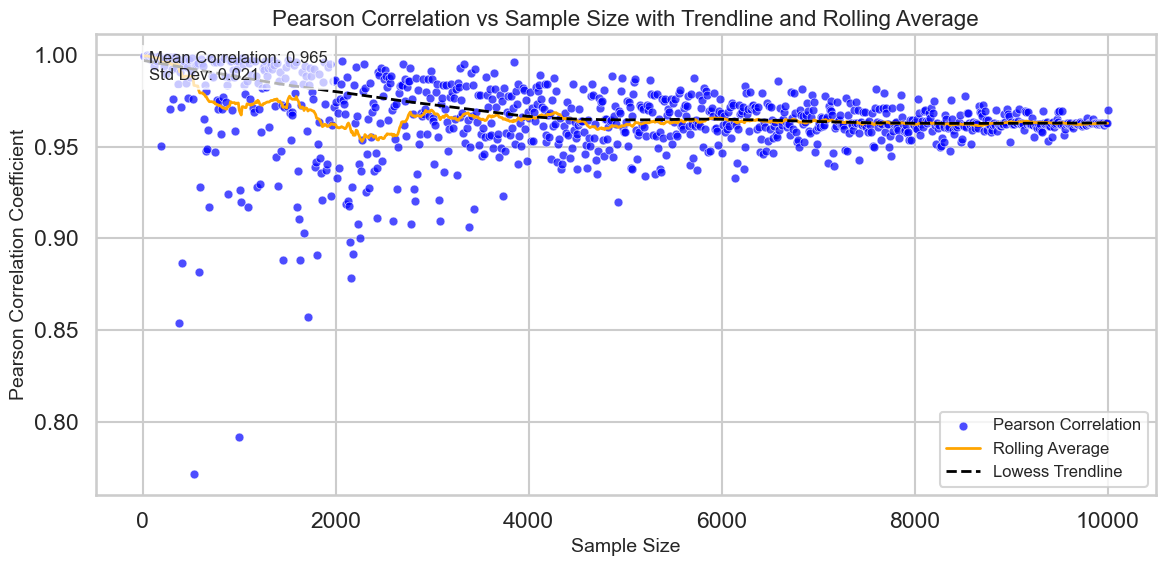

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess

def plot_pearson_with_trendline(preds, y_val, sample_sizes, rolling_window=50):
    """
    Plots Pearson correlation coefficient as a dot plot with an informative trend line and rolling average.
    
    Parameters:
    - preds: list or np.array - Predicted values.
    - y_val: list or np.array - Actual values.
    - sample_sizes: list of int - List of sample sizes to test.
    - rolling_window: int - Rolling window size for the moving average.
    
    Returns:
    - None
    """
    if len(preds) != len(y_val):
        raise ValueError("Predictions and actual values must have the same length.")
    
    correlations = []
    sizes = []
    
    # Compute Pearson correlations for each sample size
    for size in sample_sizes:
        if size > len(preds):
            raise ValueError(f"Sample size {size} exceeds the number of available data points ({len(preds)}).")
        
        # Randomly sample indices
        indices = np.random.choice(len(preds), size=size, replace=False)
        
        # Subset the data
        sampled_preds = np.array(preds)[indices]
        sampled_y_val = np.array(y_val)[indices]
        
        # Compute Pearson correlation
        correlation = np.corrcoef(sampled_preds, sampled_y_val)[0, 1]
        correlations.append(correlation)
        sizes.append(size)
    
    # Create a DataFrame for Seaborn
    data = pd.DataFrame({
        'Sample Size': sizes,
        'Pearson Correlation': correlations
    })
    
    # Calculate rolling average
    data['Rolling Average'] = data['Pearson Correlation'].rolling(rolling_window, min_periods=1).mean()
    
    # Calculate lowess (locally weighted regression) trendline
    lowess_result = lowess(data['Pearson Correlation'], data['Sample Size'], frac=0.3)
    lowess_x, lowess_y = zip(*lowess_result)
    
    # Plot with Seaborn
    sns.set(style="whitegrid", context="talk")
    plt.figure(figsize=(12, 6))
    
    # Scatterplot for the data points
    sns.scatterplot(
        x='Sample Size', 
        y='Pearson Correlation', 
        data=data, 
        s=40,  # Smaller dot size
        color='blue', 
        alpha=0.7,  # Transparency for better visibility
        label='Pearson Correlation'
    )
    
    # Plot rolling average
    sns.lineplot(
        x='Sample Size', 
        y='Rolling Average', 
        data=data, 
        color='orange', 
        linewidth=2, 
        label='Rolling Average'
    )
    
    # Plot lowess trendline
    plt.plot(
        lowess_x, lowess_y, 
        color='black', 
        linewidth=2, 
        linestyle='--', 
        label='Lowess Trendline'
    )
    
    # Add summary statistics as a text box
    mean_corr = np.mean(data['Pearson Correlation'])
    std_corr = np.std(data['Pearson Correlation'])
    plt.text(
        0.05, 0.9, 
        f"Mean Correlation: {mean_corr:.3f}\nStd Dev: {std_corr:.3f}",
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7),
        transform=plt.gca().transAxes
    )
    
    # Add labels and title
    plt.title('Pearson Correlation vs Sample Size with Trendline and Rolling Average', fontsize=16)
    plt.xlabel('Sample Size', fontsize=14)
    plt.ylabel('Pearson Correlation Coefficient', fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
plot_pearson_with_trendline(meta_preds, y_test, np.linspace(1, 10000, 1000).astype(int))

In [37]:
import numpy as np

def sample_and_compute_correlation(preds, y_val, sizes=[100, 1000, 10000]):
    """
    Randomly samples data from preds and y_val, and computes Pearson correlation 
    for each specified sample size.

    Parameters:
    - preds: list or np.array - Predicted values.
    - y_val: list or np.array - Actual values.
    - sizes: list of int - Sample sizes for which to compute correlation.

    Returns:
    - dict - Pearson correlations for each sample size.
    """
    if len(preds) != len(y_val):
        raise ValueError("Predictions and actual values must have the same length.")
    
    results = {}
    for size in sizes:
        if size > len(preds):
            raise ValueError(f"Sample size {size} exceeds the number of available data points ({len(preds)}).")
        
        # Randomly sample indices
        indices = np.random.choice(len(preds), size=size, replace=False)
        
        # Subset the data
        sampled_preds = np.array(preds)[indices]
        sampled_y_val = np.array(y_val)[indices]
        
        # Compute Pearson correlation
        correlation = np.corrcoef(sampled_preds, sampled_y_val)[0, 1]
        results[size] = correlation
    
    return results

print('Pearson corellation per samples:', sample_and_compute_correlation(meta_preds, y_test))

Pearson corellation per samples: {100: 0.9991148963942115, 1000: 0.9959929259761487, 10000: 0.9630468701711921}
